In [883]:
# Import required libraries:
import numpy as np# Define input features:
from numpy import random
from IPython.display import clear_output

from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

import pandas as pd

%matplotlib inline
import matplotlib.pyplot as plt

import os
from bioinfokit.analys import stat

import math

import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim
import pandas as pd

from numpy import linalg as LA

import datetime as dt
from datetime import timedelta
#from datetime import datetime
from pandas.tseries.holiday import USFederalHolidayCalendar as calendar


from statsmodels.graphics.tsaplots import plot_pacf
from statsmodels.graphics.tsaplots import plot_acf
from scipy.stats import linregress

from sklearn.decomposition import PCA

import researchpy as rp
import scipy.stats as stats

pd.set_option('display.max_columns', None)
pd.set_option("max_rows", 150)

def vin(x):
    y = np.sum(x in locals()) + np.sum(x in globals())
    return "not defined in env" if y == 0 else "already defined in env"


def v():
  print()
  return None

from sklearn.datasets import make_blobs
from sklearn.model_selection import LeaveOneOut
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score


from sklearn.cluster import KMeans
from math import sqrt
import  pylab as pl

from matplotlib import pyplot as plt
from sklearn.datasets.samples_generator import make_blobs
from sklearn.cluster import KMeans

pd.set_option('display.float_format', lambda x: '%.5f' % x)

import yfinance as yf

import gurobipy as gp
from gurobipy import GRB


print("\n [[IMPORT OK]]")


 [[IMPORT OK]]


In [884]:
## VAR Simulation # 6 cre loans on hotel properties

In [885]:
#time period: delta t = 1/52 (weekly); Time period = 2 year

numbonds = 6
ltv = .85
timeperiod = 52
delta_t = 1/timeperiod
ucap = .09 #annual
driffcap = .40 #annual
tottime = timeperiod * 2 # 2 years

startvalue = [np.random.randint(90,150) for x in range(numbonds)] #A0 starting asset values

loanvalues = np.round([float(x)*ltv for x in startvalue],0) #principal loan values

udrift = [np.random.uniform(.06,ucap) for x in range(numbonds)] #annual drift
mdiffuse = [np.random.uniform(.15,driffcap) for x in range(numbonds)] #annual diffusion sigma

In [886]:
#upward measure on volatility of hotel assets
#proxy for upward measure is the annual volatility measure of the movement of hotel REITS concentrated whose exposure
#of assets held is similar to the CRE loans in the portfolio for which the VAR(alpha) is being computed

#select REIT: APLE
#compute by taking the sample log std deviation of daily returns and estimating sigma ~= s/sqrt(t) | t = 1/252 (daily periods n)

reitdf = pd.read_csv("APLE_ST1.csv")

reitdf.head()

reitdf.drop(['Open','High','Low'], axis=1, inplace=True)
reitdf.Date = pd.to_datetime(reitdf['Date'])
reitdf['year'] = reitdf.Date.dt.year

,Date,Open,High,Low,Close,Adj Close,Volume
0,2017-01-03,19.98000,20.21000,19.89000,20.21000,16.18207,2407400
1,2017-01-04,20.20000,20.36000,20.05000,20.36000,16.30217,1997000
2,2017-01-05,20.16000,20.34000,20.01000,20.12000,16.11000,1989400
3,2017-01-06,20.07000,20.13000,19.94000,20.07000,16.06997,1523200
4,2017-01-09,20.08000,20.10000,19.88000,20.07000,16.06997,1489400


In [887]:
reitdf

,Date,Close,Adj Close,Volume,year
0,2017-01-03,20.21000,16.18207,2407400,2017
1,2017-01-04,20.36000,16.30217,1997000,2017
2,2017-01-05,20.12000,16.11000,1989400,2017
3,2017-01-06,20.07000,16.06997,1523200,2017
4,2017-01-09,20.07000,16.06997,1489400,2017
...,...,...,...,...,...
1002,2020-12-24,13.18000,13.16233,1219600,2020
1003,2020-12-28,13.24000,13.22225,1474100,2020
1004,2020-12-29,13.08000,13.06247,1472700,2020
1005,2020-12-30,12.99000,12.97259,1065800,2020


In [888]:
reitdf['lnclose'] = np.log(reitdf.Close)
reitdf['lndiff'] = reitdf.lnclose.diff(1)

samplestd = np.std(reitdf[reitdf.year == 2019].lndiff.dropna(), ddof=1)
estsigma = samplestd / (1/252**.5)

In [889]:
np.std(reitdf[reitdf.year == 2020].lndiff.dropna(), ddof=1) * (252**.5) #2020 ann volatility of 85% compared to 16% prior years

0.8456614981298846

In [890]:
estsigma # est annaul volatility

0.1525522770810681

In [891]:
#simulate GBM on Asset price starting at A0
trackloss = []
iruns = 1000

for y in range(iruns):
    vt = []
    for i in range(numbonds):
        vt.append([startvalue[i]])

    for j in range(numbonds):
        for i in range(tottime):
            v_ai = vt[j][i]*math.exp((udrift[j] - .5*mdiffuse[j]**2)*delta_t+mdiffuse[j]*np.random.normal(0,delta_t))
            vt[j].append(v_ai)

    lscomp = loanvalues < [min(vt[i]) for i in range(numbonds)]   

    vloss = 0

    for i in range(numbonds):
        if lscomp[i] == False:
            vloss += loanvalues[i]
    trackloss.append(vloss)

<Figure size 1440x720 with 0 Axes>

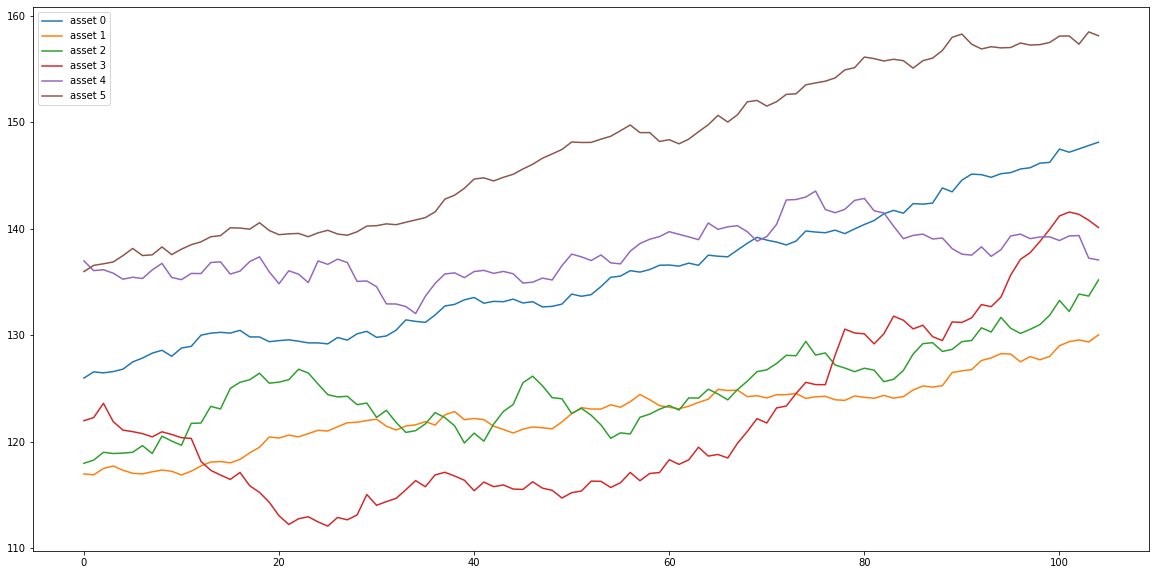

In [892]:
#graph the gbm brownian motion simulations

plt.figure(figsize=(20,10))
for x in range(numbonds):
    vlab = "asset " + str(x)
    plt.plot(np.arange(len(vt[0])),vt[x], label=vlab)


plt.legend()
plt.show()


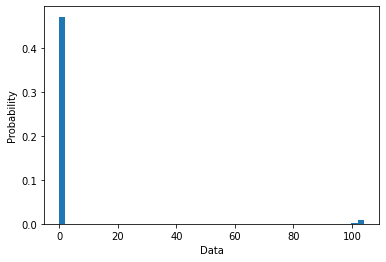

In [893]:
#pdf loss distro

plt.hist(trackloss, density=True, bins=50)  # density=False would make counts
plt.ylabel('Probability')
plt.xlabel('Data');



In [894]:
quantlist = [[np.arange(.5,1.00,.01)],[]]

for i in range(quantlist[0][0].shape[0]):
    quantlist[1].append(np.quantile(np.array(trackloss),quantlist[0][0][i]))        

Text(0.5, 0, 'quantile')

Text(0, 0.5, 'Exp Loss')

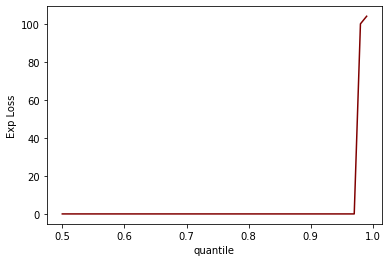

In [895]:
#VAR plot quantile (CDF) (transpose of CDF)

plt.plot(quantlist[0][0], quantlist[1], color ='maroon')
plt.xlabel("quantile")
plt.ylabel("Exp Loss")

In [896]:
#sensitivity analysis on volatiltiy spreads of assets

def sigmaspread(user_driffcap, user_start, user_loan, user_drift):
    
    
    driffcap = user_driffcap # annual sigma
    

    startvalue = user_start

    loanvalues = user_loan

    udrift = user_drift
    mdiffuse = [driffcap for x in range(numbonds)] #annual diffusion sigma
    
    #simulate GBM on Asset price starting at A0
    trackloss = []
    iruns = 5000

    for y in range(iruns):
        vt = []
        for i in range(numbonds):
            vt.append([startvalue[i]])

        for j in range(numbonds):
            for i in range(tottime):
                v_ai = vt[j][i]*math.exp((udrift[j] - .5*mdiffuse[j]**2)*delta_t+mdiffuse[j]*np.random.normal(0,delta_t))
                vt[j].append(v_ai)

        lscomp = loanvalues < [min(vt[i]) for i in range(numbonds)]   

        vloss = 0

        for i in range(numbonds):
            if lscomp[i] == False:
                vloss += loanvalues[i]
        trackloss.append(vloss)
    
    return np.quantile(np.array(trackloss), .995)


    
    


In [897]:
sigmatest = np.arange(.15,.50,.05)
sigmatrack = [[],sigmatest]

numbonds = 6
ltv = [.80, .85, .90]
timeperiod = 52
delta_t = 1/timeperiod
ucap = .09 #annual
tottime = timeperiod * 2 # 2 years

sigmatrack[0] = [(x,[]) for x in ltv]

startvalue = [np.random.randint(90,150) for x in range(numbonds)] #A0 starting asset values

udrift = [np.random.uniform(.06,ucap) for x in range(numbonds)] #annual drift

for j in range(len(sigmatrack[0])):
    loanvalues = np.round([float(x)*sigmatrack[0][j][0] for x in startvalue],0) #principal loan values

    for i in sigmatest:
        q99 = sigmaspread(i, startvalue, loanvalues, udrift)
        sigmatrack[0][j][1].append(q99)

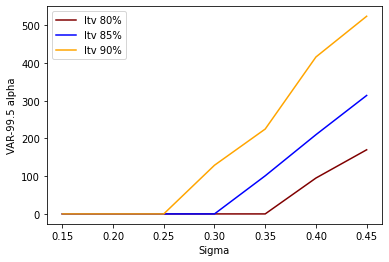

In [898]:
plt.plot(sigmatrack[1], sigmatrack[0][0][1], color ='maroon', label='ltv 80%')
plt.plot(sigmatrack[1], sigmatrack[0][1][1], color ='blue', label='ltv 85%')
plt.plot(sigmatrack[1], sigmatrack[0][2][1], color ='orange', label='ltv 90%')
plt.xlabel("Sigma")
plt.ylabel("VAR-99.5 alpha")
plt.legend()
clear_output()

In [899]:
sum(loanvalues)

617.0